# Exploratory Data Analysis on Google Landmark Recognition Challenge 

In [1]:
# Load all required libraries and packages 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## Reading data  

In [3]:
training = pd.read_csv("../kaggle/train.csv")
testing = pd.read_csv("../kaggle/test.csv")
submit = pd.read_csv("../kaggle/sample_submission.csv")

#### Inspection of both training and testing datasets


In [4]:
print ("Training dataset size:", training.shape)
print ("Testing dataset size:", testing.shape)



Training dataset size: (1225029, 3)
Testing dataset size: (117703, 2)


In [5]:
training.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231



Training dataset contains three columns - id, url and landmark_id associated to the image


In [6]:
testing.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


Testing dataset contains two columns - id and url associated to the image

## Submission file format 

In [7]:
submit.head()

,id,images
0,000088da12d664db,0370c4c856f096e8 766677ab964f4311 e3ae4dcee813...
1,0001623c6d808702,b01175326ee19742 67eb4fc9ff184bd2 0f775e72c031...
2,0001bbb682d45002,5101d06f891261be ae9c548dcf7102e2 a42098eb2dd3...
3,0002362830cfe3a3,40cb31b754bb7249 f860d7fbb0073fab 492c16c0584d...
4,000270c9100de789,fe3a62d9b50ca221 5005114ed61af1bc 754e137d888d...


## Inspect quality of data
Inspecting data quality to see if it contains any missing values in both training and testing datasets 

## Training Data Quality 

In [8]:
missing_values = training.isnull().sum()
total = training.count()
missing_training = pd.concat([missing_values,total], axis=1, keys= ['Missing Values', 'Total'])
missing_training

,Missing Values,Total
id,0,1225029
url,0,1225029
landmark_id,0,1225029


Training data set doesn't contains any missing values 

## Testing Data Quality 

In [9]:
missing_values = testing.isnull().sum()
total = testing.count()
missing_testing = pd.concat([missing_values,total], axis=1, keys= ['Missing Values', 'Total'])
missing_testing

,Missing Values,Total
id,0,117703
url,0,117703


Testing data set doesn't contains any missing values

## Unique Elements 

Checking unique values in both training and testing datasets. Also checking for unique values after concatenating both the datasets 

In [10]:
training.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

In [11]:
testing.nunique()

id     117703
url    117703
dtype: int64

In [12]:
combined_result = pd.concat([training,testing])
combined_result.shape

(1342732, 3)

In [13]:
combined_result.nunique()

id             1342732
landmark_id      14951
url            1342732
dtype: int64

## Most Frequent Landmarks 

In [28]:
freq = pd.DataFrame(training.landmark_id.value_counts().head(6))
freq.reset_index(inplace= True)
freq.columns = ['landmark_id', 'count']
freq

,landmark_id,count
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271
5,5554,11147


Most frequest landmark id: 9633 and count: 50337

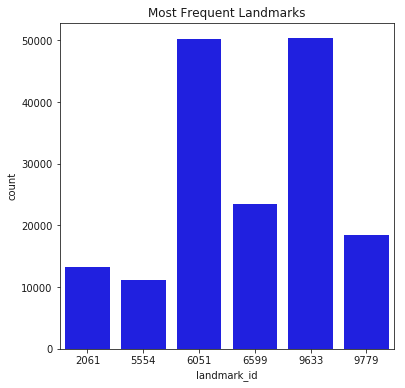

In [29]:
plt.figure(figsize = (6, 6))
plt.title('Most Frequent Landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=freq,
            label="Count", color="blue")
plt.show()

## Least Frequent Landmarks 

In [30]:
freq = pd.DataFrame(training.landmark_id.value_counts().tail(6))
freq.reset_index(inplace= True)
freq.columns = ['landmark_id', 'count']
freq

,landmark_id,count
0,4144,1
1,1527,1
2,6025,1
3,4334,1
4,5865,1
5,8381,1


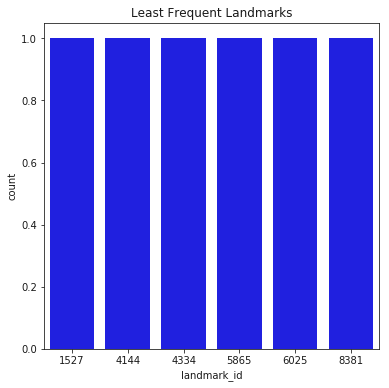

In [31]:
plt.figure(figsize = (6, 6))
plt.title('Least Frequent Landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=freq,
            label="Count", color="blue")
plt.show()